In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pandas_profiling as pp

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder,OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [4]:
df = sns.load_dataset('penguins')
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [6]:
pp.ProfileReport(df,explorative=True,title='Penguins')

Render HTML: 100%|██████████| 1/1 [00:03<00:00,  3.74s/it]


In [7]:
from sklearn.impute import SimpleImputer

In [11]:
df_impute = SimpleImputer(strategy='most_frequent')

In [12]:
df['bill_length_mm'] = df_impute.fit_transform(df[['bill_length_mm']])
df['bill_depth_mm'] = df_impute.fit_transform(df[['bill_depth_mm']])
df['flipper_length_mm'] = df_impute.fit_transform(df[['flipper_length_mm']])
df['body_mass_g'] = df_impute.fit_transform(df[['body_mass_g']])
df['sex'] = df_impute.fit_transform(df[['sex']])

In [13]:
df.isnull().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [14]:
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,41.1,17.0,190.0,3800.0,Male
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,41.1,17.0,190.0,3800.0,Male
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


In [26]:
island_hot_enc = OneHotEncoder(drop='first')
island_dummies = island_hot_enc.fit_transform(df[['island']]).toarray()

In [27]:
sex_label = LabelEncoder()
df['sex'] = sex_label.fit_transform(df[['sex']])

In [61]:
df['island'].unique()

array(['Torgersen', 'Biscoe', 'Dream'], dtype=object)

In [64]:
dummy_df = pd.DataFrame(island_dummies,columns=['Biscoe', 'Dream'])
dummy_df

,Biscoe,Dream
0,0.0,1.0
1,0.0,1.0
2,0.0,1.0
3,0.0,1.0
4,0.0,1.0
...,...,...
339,0.0,0.0
340,0.0,0.0
341,0.0,0.0
342,0.0,0.0


In [65]:
new_df = pd.concat([df,dummy_df],axis=1)
new_df.drop(labels=['island'],axis=1,inplace=True)
new_df

,species,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,Biscoe,Dream
0,Adelie,39.1,18.7,181.0,3750.0,1,0.0,1.0
1,Adelie,39.5,17.4,186.0,3800.0,0,0.0,1.0
2,Adelie,40.3,18.0,195.0,3250.0,0,0.0,1.0
3,Adelie,41.1,17.0,190.0,3800.0,1,0.0,1.0
4,Adelie,36.7,19.3,193.0,3450.0,0,0.0,1.0
...,...,...,...,...,...,...,...,...
339,Gentoo,41.1,17.0,190.0,3800.0,1,0.0,0.0
340,Gentoo,46.8,14.3,215.0,4850.0,0,0.0,0.0
341,Gentoo,50.4,15.7,222.0,5750.0,1,0.0,0.0
342,Gentoo,45.2,14.8,212.0,5200.0,0,0.0,0.0


In [66]:
print(new_df.columns.to_list())

['species', 'bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g', 'sex', 'Biscoe', 'Dream']


In [67]:
x = new_df[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g', 'sex','Biscoe', 'Dream' ]]
y = new_df['species']
scaler = StandardScaler()
scaled_x = scaler.fit_transform(x)

In [68]:
trainx,testx,trainy,testy = train_test_split(scaled_x,y,test_size=.2,random_state=0)

In [69]:
clf = LogisticRegression()
clf.fit(trainx,trainy)
clf1 = KNeighborsClassifier(n_neighbors=7)
clf1.fit(trainx,trainy)
clf2 = SVC()
clf2.fit(trainx,trainy)

SVC()

In [70]:
ypred = clf.predict(testx)
ypred1 = clf.predict(testx)
ypred2 = clf.predict(testx)

In [71]:
from sklearn.metrics import confusion_matrix,plot_confusion_matrix

In [72]:
print('Logistic Regression')
print(confusion_matrix(testy,ypred))
print('.'*20)
print('KNN')
print(confusion_matrix(testy,ypred1))
print('.'*20)
print('SVC')
print(confusion_matrix(testy,ypred2))


Logistic Regression
[[33  1  0]
 [ 0 10  0]
 [ 0  0 25]]
....................
KNN
[[33  1  0]
 [ 0 10  0]
 [ 0  0 25]]
....................
SVC
[[33  1  0]
 [ 0 10  0]
 [ 0  0 25]]


### confusion_matrix of logistic regression,knn and svc are same,so the graph of all are also same

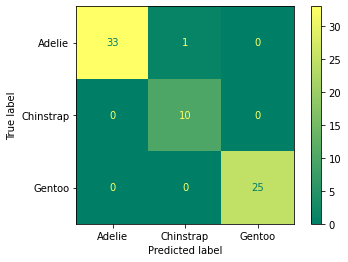

In [73]:
plot_confusion_matrix(clf,testx,testy,cmap='summer')
plt.show()

In [74]:
print('Logistic Regression Score: ',clf.score(testx,testy)*100)
print('KNN Score: ',clf1.score(testx,testy)*100)
print('SVC Score: ',clf2.score(testx,testy)*100)

Logistic Regression Score:  98.55072463768117
KNN Score:  98.55072463768117
SVC Score:  98.55072463768117
